In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
info_df_TRAIN = pd.read_csv("Traveldata_Train.csv")
response_df_TRAIN = pd.read_csv("Surveydata_Train.csv")

info_df_TEST = pd.read_csv("Traveldata_Test.csv")
response_df_TEST = pd.read_csv("Surveydata_Test.csv")

print("TRAIN:")
print(info_df_TRAIN.shape)
print(response_df_TRAIN.shape)
print("-" * 30)
print("TEST:")
print(info_df_TEST.shape)
print(response_df_TEST.shape)

TRAIN:
(94379, 9)
(94379, 17)
------------------------------
TEST:
(35602, 9)
(35602, 16)


In [3]:
info_df_TRAIN.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [4]:
response_df_TRAIN.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [5]:
df_TRAIN = info_df_TRAIN.merge(response_df_TRAIN, how='inner', on='ID')
df_TEST = info_df_TEST.merge(response_df_TEST, how='inner', on='ID')
print(df_TRAIN.shape)
print(df_TEST.shape)

(94379, 25)
(35602, 24)


In [6]:
print("TRAIN:")
print(df_TRAIN.isnull().sum())
print("-" * 50)
print("TEST:")
print(df_TEST.isnull().sum())

TRAIN:
ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64
--------------------------------------------------
TEST:
ID                            0
Gender                       30
Customer_Type              3383
Age                        

In [7]:
# all null
print(((df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# all notnull
print(((~df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (~df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# arrival null
print(((df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (~df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# departure null
print(((~df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

57
94022
300
0


In [8]:
# all null
print(((df_TEST['Arrival_Delay_in_Mins'].isnull()) & (df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# all notnull
print(((~df_TEST['Arrival_Delay_in_Mins'].isnull()) & (~df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# arrival null
print(((df_TEST['Arrival_Delay_in_Mins'].isnull()) & (~df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# departure null
print(((~df_TEST['Arrival_Delay_in_Mins'].isnull()) & (df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

29
35479
94
0


## Setup A
- Imputation:
  - Numeric: **Median**
  - Categorical: **NA**
- Encoding:
  - One-Hot Encoding: Gender, Customer_Type, Type_Travel, Travel_Class, Seat_Class 
  - Ordinal Encoding: Seat_Comfort, Arrival_Time_Convenient, Catering, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding 
- Feature Engineering:
  - **Total_Delay_in_Mins** (Departure_Delay_in_Mins + Arrival_Delay_in_Mins)
  - Feature Interaction
  - Group Features

In [9]:
df_imputed_1 = df_TRAIN.copy()

In [10]:
vars_median_1 = dict(df_imputed_1[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].median())
df_imputed_1[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = df_imputed_1[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].fillna(vars_median_1)

In [11]:
df_imputed_1['Total_Delay_in_Mins'] = df_imputed_1['Departure_Delay_in_Mins'] + df_imputed_1['Arrival_Delay_in_Mins']
df_preprocessed_1 = df_imputed_1.drop(['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis=1)
df_preprocessed_1.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Total_Delay_in_Mins           0
dtype: int64

In [12]:
df_preprocessed_1.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Overall_Experience,Seat_Comfort,Seat_Class,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay_in_Mins
82582,98882583,Male,Loyal Customer,8.0,Personal Travel,Eco,2705,0,Acceptable,Ordinary,...,Acceptable,Good,Good,NaN,Acceptable,Excellent,Excellent,Excellent,Good,0.0
88596,98888597,Male,Loyal Customer,20.0,NaN,Eco,2508,1,Excellent,Green Car,...,Excellent,Acceptable,Acceptable,Excellent,Acceptable,Acceptable,Excellent,Good,Acceptable,0.0
54268,98854269,Male,Loyal Customer,62.0,Business Travel,Business,2960,0,Good,Ordinary,...,Good,Acceptable,Good,Good,Good,Good,Needs Improvement,Good,Good,7.0
68553,98868554,Female,Loyal Customer,26.0,Business Travel,Business,2183,1,Needs Improvement,Ordinary,...,Excellent,Good,Good,Acceptable,Excellent,Good,Acceptable,Excellent,Good,6.0
12484,98812485,Female,Disloyal Customer,80.0,Business Travel,Business,220,0,Good,Green Car,...,Acceptable,Good,Poor,Poor,Good,Poor,Good,Poor,Good,7.0


## Setup B
- Imputation:
  - Numeric: **Median + Regression**
  - Categorical: **NA**
- Encoding:
  - One-Hot Encoding: Gender, Customer_Type, Type_Travel, Travel_Class, Seat_Class 
  - Ordinal Encoding: Seat_Comfort, Arrival_Time_Convenient, Catering, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding 
- Feature Engineering:
  - **Total_Delay_in_Mins** (Departure_Delay_in_Mins + Arrival_Delay_in_Mins)
  - Feature Interaction
  - Group Features

In [13]:
df_imputed_2 = df_TRAIN.copy()

In [14]:
from sklearn.linear_model import LinearRegression
    
# TRAIN
mask_notnull = ((~df_imputed_2['Departure_Delay_in_Mins'].isnull()) & (~df_imputed_2['Arrival_Delay_in_Mins'].isnull()))
X_TRAIN = df_imputed_2[mask_notnull][['Departure_Delay_in_Mins']]
y_TRAIN = df_imputed_2[mask_notnull][['Arrival_Delay_in_Mins']]

lr = LinearRegression()
lr.fit(X_TRAIN, y_TRAIN)
print(f'score: {lr.score(X_TRAIN, y_TRAIN)}')
print(f'coef: {lr.coef_}')

# PREDICT
mask_null = ((~df_imputed_2['Departure_Delay_in_Mins'].isnull()) & (df_imputed_2['Arrival_Delay_in_Mins'].isnull()))
X_TRAIN_pred = df_imputed_2[mask_null][['Departure_Delay_in_Mins']]
y_TRAIN_pred = lr.predict(X_TRAIN_pred).flatten()

# FILL 
df_imputed_2.loc[mask_null, 'Arrival_Delay_in_Mins'] = y_TRAIN_pred

score: 0.932157468408056
coef: [[0.9771727]]


In [15]:
vars_median_2 = dict(df_imputed_2[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].median())
df_imputed_2[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']] = df_imputed_2[['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']].fillna(vars_median_2)

df_imputed_2['Total_Delay_in_Mins'] = df_imputed_2['Departure_Delay_in_Mins'] + df_imputed_2['Arrival_Delay_in_Mins']
df_preprocessed_2 = df_imputed_2.drop(['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis=1)
df_preprocessed_2.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Total_Delay_in_Mins           0
dtype: int64

In [16]:
df_preprocessed_2.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Overall_Experience,Seat_Comfort,Seat_Class,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Total_Delay_in_Mins
36845,98836846,Male,Loyal Customer,23.0,NaN,Business,2695,0,Acceptable,Green Car,...,Acceptable,Acceptable,Acceptable,Poor,Acceptable,Acceptable,Good,Good,Acceptable,30.0
58892,98858893,Female,Loyal Customer,40.0,Personal Travel,Eco,2317,1,Excellent,Green Car,...,Excellent,Acceptable,Acceptable,Needs Improvement,Excellent,Acceptable,Needs Improvement,Acceptable,Acceptable,0.0
57963,98857964,Female,Loyal Customer,26.0,Business Travel,Eco,3955,1,Good,Green Car,...,Excellent,Excellent,Good,Acceptable,Needs Improvement,Excellent,Good,Excellent,Good,4.0
85166,98885167,Male,Loyal Customer,32.0,Personal Travel,Eco,1954,0,Needs Improvement,Green Car,...,Needs Improvement,Needs Improvement,Needs Improvement,Poor,Good,Needs Improvement,Poor,Acceptable,Needs Improvement,2.0
61950,98861951,Male,Disloyal Customer,62.0,Business Travel,Business,1619,0,Needs Improvement,Green Car,...,Needs Improvement,Excellent,Poor,NaN,Acceptable,Good,Good,Excellent,Poor,0.0


## Setup C
- Imputation:
  - Numeric: **Median + Regression**
  - Categorical: **NA + MF**
- Encoding:
  - One-Hot Encoding: Gender, Customer_Type, Type_Travel, Travel_Class, Seat_Class 
  - Ordinal Encoding: X
- Feature Engineering:
  - **Total_Delay_in_Mins** (Departure_Delay_in_Mins + Arrival_Delay_in_Mins)
  - Feature Interaction
  - Group Features

In [17]:
df_imputed_3 = df_TRAIN.copy()

In [18]:
df_interaction = df_imputed_3[[
    'ID', 'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
    'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]].set_index('ID')
df_interaction.sample(3)

,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,
98854193,Poor,Extremely Poor,Poor,Very Convenient,Excellent,Poor,Excellent,Excellent,Poor,Excellent,Acceptable,Good,Needs Improvement,Excellent
98839998,Excellent,Good,Poor,Convenient,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Poor,Excellent,Acceptable,Excellent,Excellent
98828388,Needs Improvement,Good,Needs Improvement,Needs Improvement,Poor,Excellent,Excellent,Good,NaN,Good,Good,Good,Good,Needs Improvement


In [19]:
df_interaction_melted = df_interaction.unstack().reset_index().rename(columns={'level_0': 'Question', 'level_1': 'ID', 0: 'Response'})
df_interaction_melted = df_interaction_melted.dropna(axis=0)
df_interaction_melted.head()

,Question,ID,Response
0,Seat_Comfort,98800001,Needs Improvement
1,Seat_Comfort,98800002,Poor
2,Seat_Comfort,98800003,Needs Improvement
3,Seat_Comfort,98800004,Acceptable
4,Seat_Comfort,98800005,Acceptable


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

responses_map = {
    'Extremely Poor': 0,
    'Very Inconvenient': 0,
    'Poor': 1,
    'Inconvenient': 1,
    'Needs Improvement': 2,
    'Manageable': 3, 
    'Acceptable': 3,
    'Good': 4,
    'Convenient': 4, 
    'Excellent': 5,
    'Very Convenient': 5
}

df_interaction_melted['Question'] = df_interaction_melted[['Question']].apply(le.fit_transform)
df_interaction_melted['Response'] = df_interaction_melted[['Response']].replace(responses_map)
df_interaction_melted.head()

,Question,ID,Response
0,13,98800001,2
1,13,98800002,1
2,13,98800003,2
3,13,98800004,3
4,13,98800005,3


ID
98894379    14
98836379    14
98836367    14
98836369    14
98836370    14
            ..
98869916     8
98804478     8
98853011     8
98808776     7
98847007     6
Name: Question, Length: 94379, dtype: int64


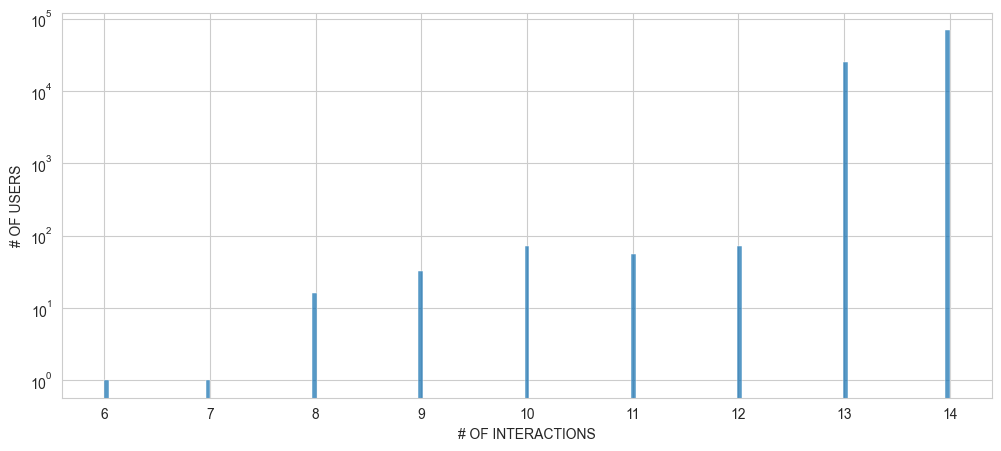

In [21]:
interactions = df_interaction_melted.groupby('ID')['Question'].size().sort_values()
print(interactions[::-1])

plt.figure(figsize = (12, 5))
sns.histplot(interactions, log_scale=(False, True))
plt.xlabel('# OF INTERACTIONS')
plt.ylabel('# OF USERS')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD

In [23]:
reader = Reader(rating_scale=(0, 5))
surprise = Dataset.load_from_df(df_interaction_melted[['ID', 'Question', 'Response']], reader)
surprise_TRAIN, surprise_TEST = train_test_split(surprise, test_size=0.2, random_state=50)

In [24]:
mf_model = SVD()
mf_model.fit(surprise_TRAIN)

predictions = mf_model.test(surprise_TEST)
accuracy.rmse(predictions)

RMSE: 1.0527


1.0526640364936897

In [25]:
interaction_matrix = df_interaction_melted.pivot(index='ID', columns='Question', values='Response')
interaction_matrix

Question,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ID,,,,,,,,,,,,,,
98800001,5.0,2.0,5.0,4.0,2.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,5.0,2.0
98800002,5.0,1.0,1.0,2.0,4.0,4.0,2.0,1.0,5.0,4.0,4.0,4.0,2.0,1.0
98800003,2.0,5.0,2.0,4.0,5.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,2.0,2.0
98800004,2.0,3.0,NaN,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0
98800005,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98894375,4.0,4.0,4.0,2.0,4.0,1.0,4.0,1.0,4.0,1.0,1.0,1.0,4.0,1.0
98894376,4.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,2.0,4.0,5.0,4.0,4.0
98894377,2.0,4.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,2.0


In [26]:
for customer_id in interaction_matrix.index:
    non_interacted_questions = interaction_matrix.loc[customer_id][interaction_matrix.loc[customer_id].isnull()].index.tolist()

    for question_id in non_interacted_questions:
        prediction_id = mf_model.predict(customer_id, question_id).est
        interaction_matrix.loc[customer_id, question_id] = prediction_id

converted_cols = interaction_matrix.columns
original_cols = le.inverse_transform(interaction_matrix.columns)
interaction_matrix_fn = interaction_matrix.rename(columns=dict(zip(converted_cols, original_cols))).reset_index()
interaction_matrix_fn.columns.name = None

interaction_matrix_fn.isnull().sum()

ID                         0
Arrival_Time_Convenient    0
Baggage_Handling           0
Catering                   0
CheckIn_Service            0
Cleanliness                0
Ease_of_Online_Booking     0
Legroom                    0
Onboard_Entertainment      0
Onboard_Service            0
Onboard_Wifi_Service       0
Online_Boarding            0
Online_Support             0
Platform_Location          0
Seat_Comfort               0
dtype: int64

In [27]:
interaction_matrix_fn.sample(5)

,ID,Arrival_Time_Convenient,Baggage_Handling,Catering,CheckIn_Service,Cleanliness,Ease_of_Online_Booking,Legroom,Onboard_Entertainment,Onboard_Service,Onboard_Wifi_Service,Online_Boarding,Online_Support,Platform_Location,Seat_Comfort
80652,98880653,5.000000,5.0,2.000000,3.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0
69167,98869168,4.000000,5.0,2.193633,5.0,4.0,5.0,3.0,2.0,3.0,5.0,5.0,5.0,1.0,3.0
74799,98874800,4.000000,4.0,3.709153,3.0,4.0,2.0,5.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0
9967,98809968,2.000000,4.0,2.000000,4.0,4.0,4.0,4.0,3.0,4.0,2.0,5.0,4.0,2.0,2.0
5710,98805711,2.044576,4.0,0.000000,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,5.0,0.0
